In [158]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from formation_channels import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import random # for random no drawing in Formation plot 



In [11]:
DCOtype='BNS'
BPSmodelName ='A'

#####



DCOname = DCOname_dict[DCOtype]

# path for files 
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
path_ = path_dir
path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'




# read in data 
fdata = h5.File(path)



seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
channels = identify_formation_channels(seeds=seeds, file=fdata)




In [12]:
mssfr = '000' # fiducial 
############


# M1 will be the most massive, M2 the least massive compact object. 
M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])


fparam_intrinsic = 'weights_intrinsic' ## get intrinsic weights
fparam_detected = 'weights_detected' ## get detected weights
weightheader = 'w_' + mssfr

w_det = fdata[fparam_detected][weightheader][...].squeeze()
w_int = fdata[fparam_intrinsic][weightheader][...].squeeze()



channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}   

  

In [165]:
def plot_3Msun_lines(axes, xlim=[1,100]):
    
    # m1 = 3 Msun 
    q = np.linspace(0, 1, 100)
    m1 = 3
    mtot = (q+1) * m1
    
    axes.plot(mtot, q, c='gray', lw=2, linestyle=':', zorder=1E4)
    axes.text(mtot[10], q[10], s=r'$m_1 = 3 \, \rm{M}_{\odot}$', fontsize=fs-6, rotation=72, va='bottom', ha='center')
        
    # m2 = 3 Msun 
    q=np.linspace(0.001, 1, 100)
    m2 = 3 # Msun 
    mtot = (1+(1/q))*m2
    axes.plot(mtot, q, c='gray', lw=2, linestyle=':', zorder=1E4)
    axes.text(mtot[2], q[2], s=r'$m_2 = 3 \, \rm{M}_{\odot}$', fontsize=fs-6, rotation=-3)
    
    

    return



def make_up_axes(axes=None, xlim=[2,400], ylim=[0,1], xlabel=r'Total mass $[M_{\odot}]$', ylabel=r'q', logX=True):
    
    
    if (xlabel!=None) & (ylabel!=None):
        layoutAxes(ax=axes, nameX=xlabel, nameY=ylabel, labelpad=20)
    elif xlabel==None:
        layoutAxesNoXlabel(ax=axes, nameX=xlabel, nameY=ylabel, labelpad=20)
    elif ylabel==None:
        layoutAxesNoYlabel(ax=axes, nameX=xlabel, nameY=ylabel, labelpad=20)    
        
    axes.set_xlim(xlim[0],xlim[1])
    axes.set_ylim(ylim[0], ylim[1])
    
    if logX!=False:
        axes.set_xscale('log')     
    
    return 




def plot_x_ticks(axe=None, xtick_loc=[1, 2, 4, 7, 10, 20, 40, 70, 100, 200, 400], ytick_loc=[0.2, 0.4, 0.6, 0.8], xlim=[2,400], ylim=[0,1]):
    

    
    xtick_name = []
    for ind, xtick in enumerate(xtick_loc):
        xtick_name.append(str(xtick))
        axe.plot(np.ones(100)*xtick, np.linspace(ylim[0], ylim[1], 100), c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_xticks(xtick_loc)
    axe.set_xticklabels(xtick_name, fontsize=fs, rotation=0)#, orientation=30) 
    
    
    ytick_name = []
    for ind, ytick in enumerate(ytick_loc):
        ytick_name.append(str(ytick))
        axe.plot(np.linspace(xlim[0], xlim[1], 100), np.ones(100)*ytick, c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_yticks(ytick_loc)
    axe.set_yticklabels(ytick_name, fontsize=fs, rotation=0)#, orientation=30)  
    
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    
    
    # grid lines:
    
    
    
    return 





def plot_x_ticks_formation_channels(axe=None, xtick_loc=[1, 2, 4, 7, 10, 20, 40, 70, 100, 200, 400], ytick_loc=[0.1, 0.3, 0.5, 0.7, 0.9], xlim=[2,400], ylim=[0,1]):
    


        
    dictChannelsBHNSListBoltWithEnter = [r'\textbf{(V)}' +'\n'+ r'\textbf{Other}',  r'\textbf{(IV)}' +'\n'+ r'\textbf{Double-core CE}' +'\n'+ r'\textbf{as first mass transfer}', r'\textbf{(III)}' +'\n'+ r'\textbf{Single-core CE}' +'\n'+ r'\textbf{as first mass transfer}',\
    r'\textbf{(II)}' +'\n'+ r'\textbf{Only stable}' +'\n'+ r'\textbf{mass transfer}', r'\textbf{(I)}' +'\n'+ r'\textbf{Classic}']  
    
    
    xtick_name = []
    for ind, xtick in enumerate(xtick_loc):
        xtick_name.append(str(xtick))
        axe.plot(np.ones(100)*xtick, np.linspace(ylim[0], ylim[1], 100), c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_xticks(xtick_loc)
    axe.set_xticklabels(xtick_name, fontsize=fs+2, rotation=0)#, orientation=30) 
    
    
    ytick_name = []
    for ind, ytick in enumerate([0.2, 0.4, 0.6, 0.8]):
        axe.plot(np.linspace(xlim[0], xlim[1], 100), np.ones(100)*ytick, c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_yticks(ytick_loc)
    axe.set_yticklabels(dictChannelsBHNSListBoltWithEnter, fontsize=fs-4, rotation=0)#, orientation=30)  
    
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    
    
    # grid lines:
    
    
    
    return 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
for ind_bps, BPSmodelName in enumerate(BPSnameslist):
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    plot_3Msun_lines(axes=axes, xlim=[2,400])
    make_up_axes(axes=axes) 
    plot_x_ticks(axe=axes) # has to go after make_up_axes 
    
    
    for ind_dco, DCOtype in enumerate(['BNS']):
    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_dir
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
        #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])



        for ind_c, Channel in enumerate([0,1,2,3,4]):

            mask_c  = (channels==Channel)


            Mtot = M1[mask_c] + M2[mask_c] 
            massRatio = M2[mask_c]/M1[mask_c]

            plt.scatter(Mtot, massRatio, c=channelColorDict[Channel], zorder=1E2, s=0.5, alpha=0.1)



        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_Mtot_q/Formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)
    
    
    plt.show()
    plt.close()

# Chirp mass 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'Chirp mass $[M_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[1, 2, 4, 7, 10, 20, 40, 70, 100], xlim=[1,100]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            Chirpmass = chirpmass(M1[mask_c],M2[mask_c])
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(Chirpmass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=20.5, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mchirp/Mchirp_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# Total Mass 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'Total mass $[M_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[2, 4, 7, 10, 20, 40, 70, 100, 200, 400], xlim=[2,400]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass = M1[mask_c]+ M2[mask_c]
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mtot/Mtot_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# Mass ratio 

now at DCOtype BNS
now at DCOtype BHNS
now at DCOtype BBH


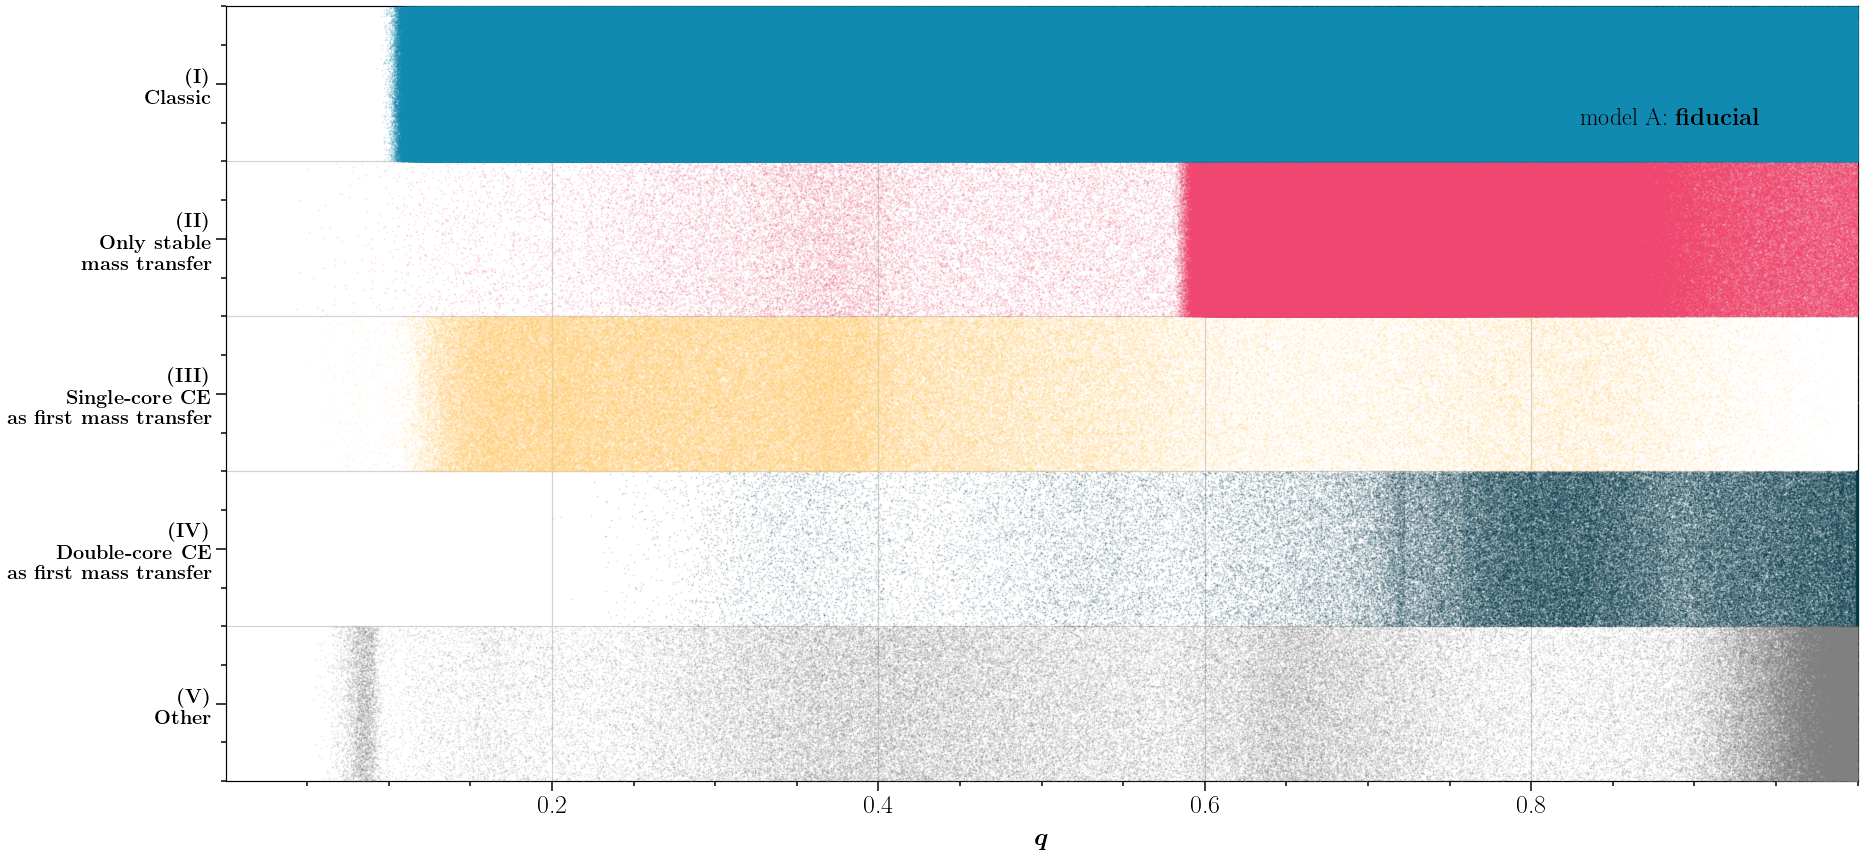

now at DCOtype BNS
now at DCOtype BHNS
now at DCOtype BBH


In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes, zorder=1E8)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'$q$ ', ylabel=None, logX=False) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[0.2, 0.4, 0.6, 0.8], xlim=[0,1]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass = M2[mask_c] /  M1[mask_c]
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/MassRatio/MassRatio_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# MASS 1 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'$m_1 \, [\rm{M}_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[1,2, 4, 7, 10, 20, 40, 70, 100], xlim=[1,100]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass = M1[mask_c]
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mass1/Mass1_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# Mass 2

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'$m_2 \, [\rm{M}_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[1,2, 4, 7, 10, 20, 40, 70, 100], xlim=[1,100]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass =  M2[mask_c]
            random_nr = np.random.random(len(M2[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mass2/Mass2_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()


